In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### EDA

### Histogram (for distribution)

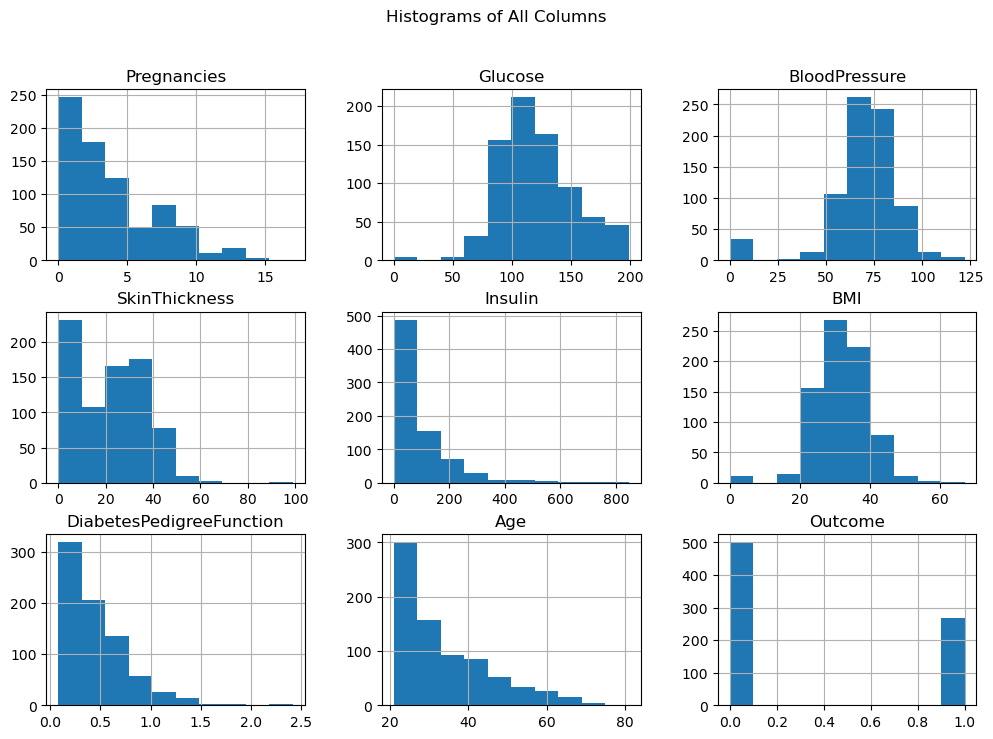

In [7]:
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of All Columns')
plt.show()

### Boxplot (for outlier detection)

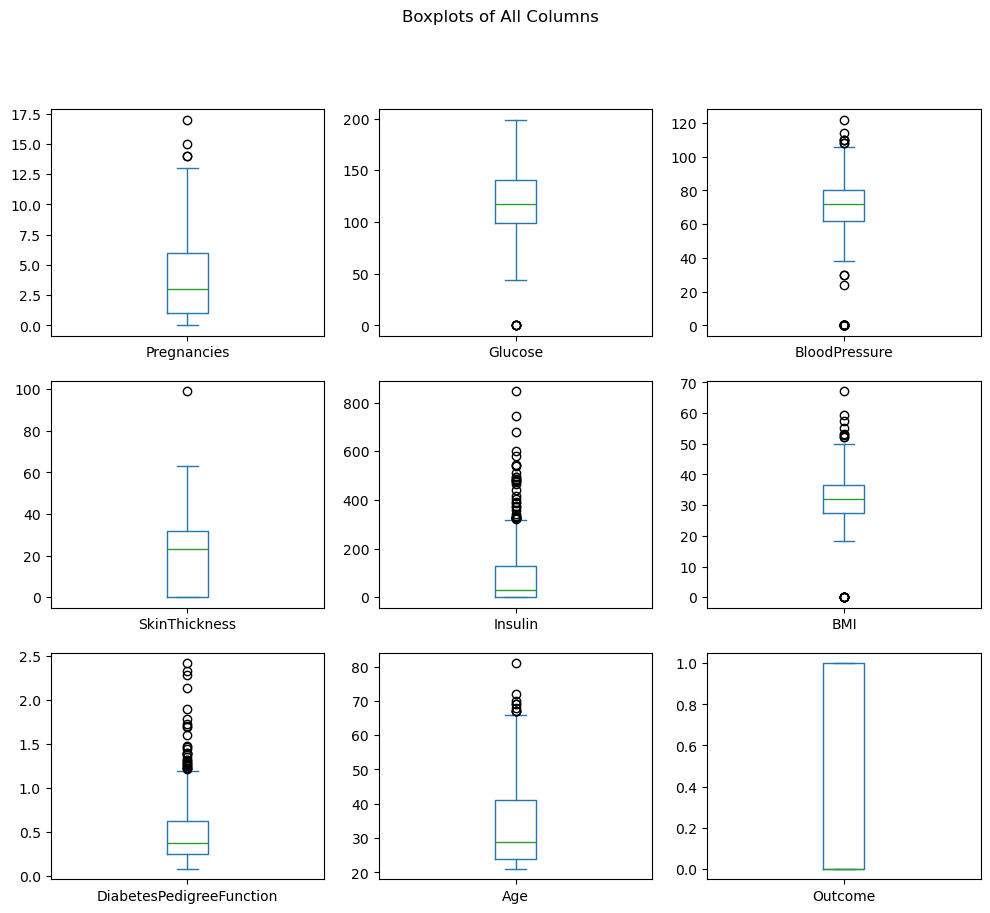

In [10]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of All Columns')
plt.show()


### Scatter plot matrix (for relationships between variables)

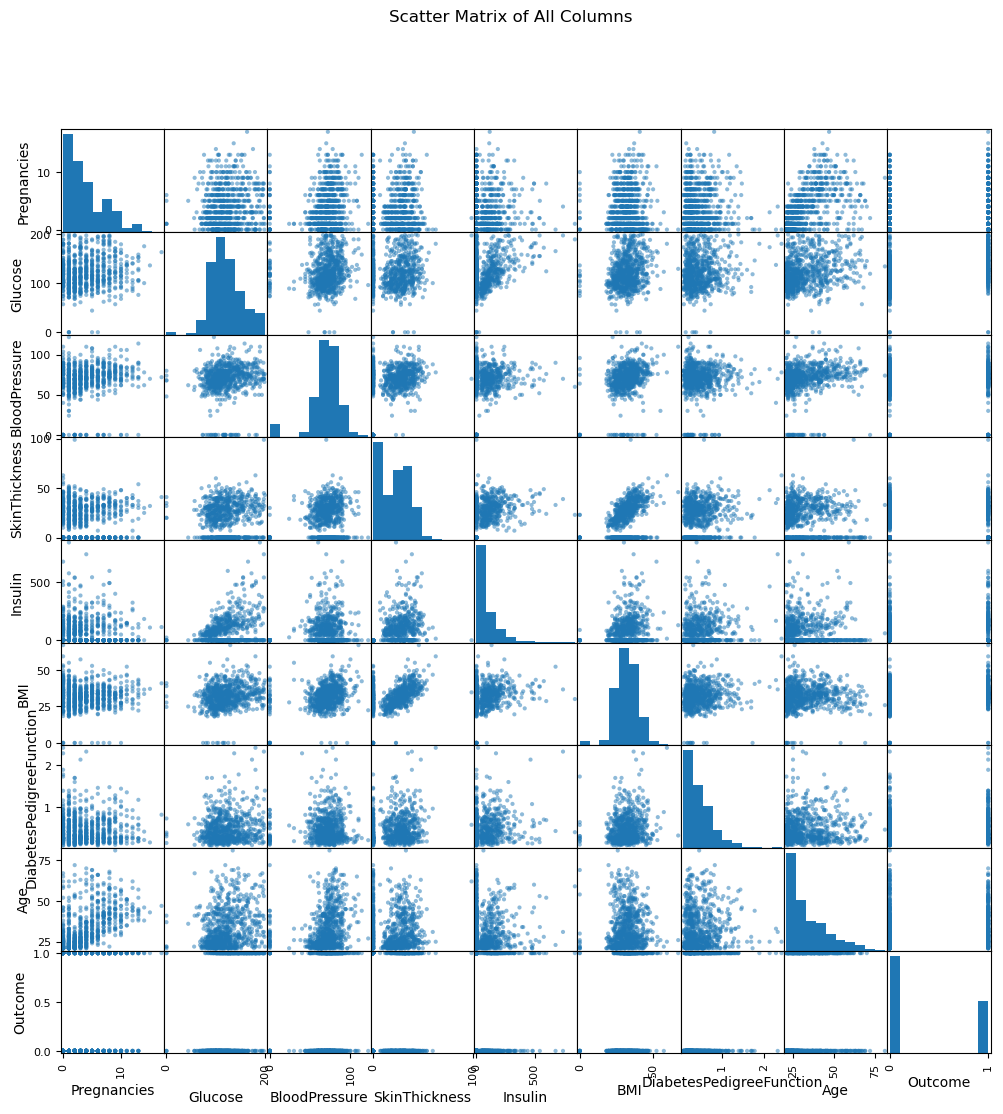

In [14]:
scatter_matrix(df, figsize=(12, 12))
plt.suptitle('Scatter Matrix of All Columns')
plt.show()

### Line plot

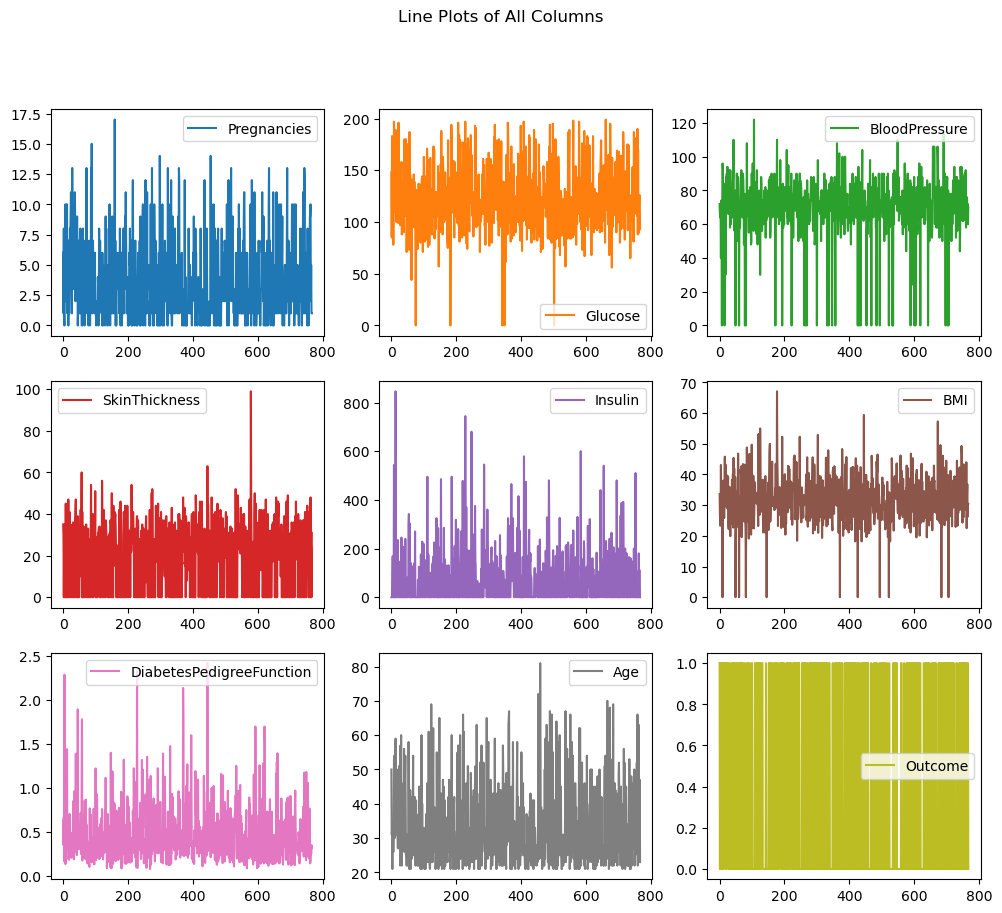

In [15]:
df.plot(kind='line', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Line Plots of All Columns')
plt.show()

### Bar plot

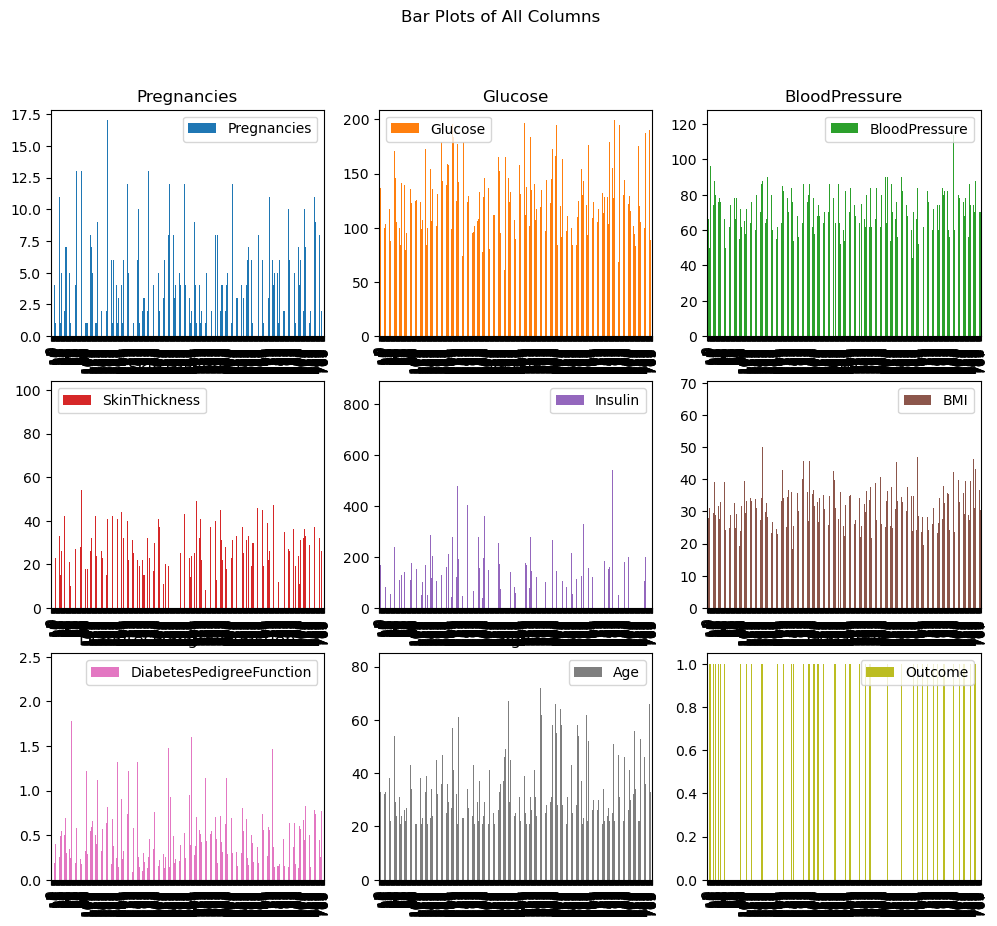

In [16]:
df.plot(kind='bar', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Bar Plots of All Columns')
plt.show()

### Correlation heatmap (to show relationships between columns)

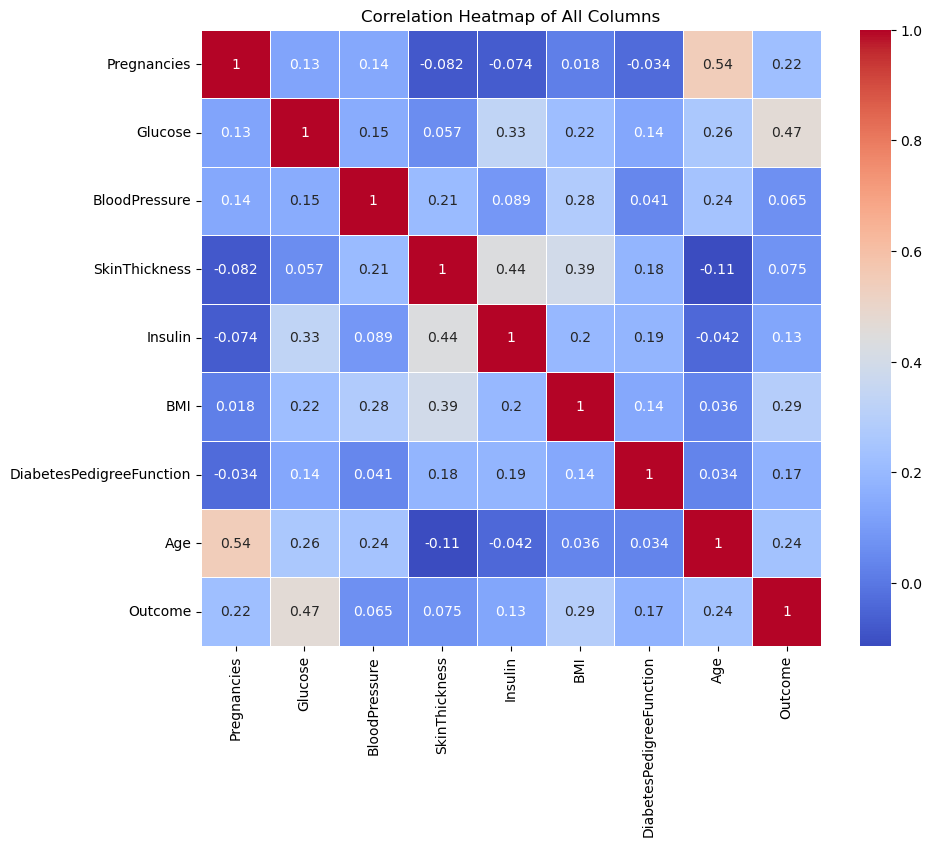

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

In [47]:
continues_data = ["BMI","DiabetesPedigreeFunction"]
def handle_outliers_and_missing(df, column_names, threshold=3):
    """
    Replacing the missing values with mean and detecting the outliers with z-score and capping the outlier with the value
    of 3(z-score)
    """
    df = df.copy()
    for column_name in column_names:
        df['z_score'] = (df[column_name] - df[column_name].mean()) / df[column_name].std()

        std_dev = df[column_name].std()
        lower_threshold = df[column_name].mean() - threshold * std_dev
        upper_threshold = df[column_name].mean() + threshold * std_dev

        df.loc[df['z_score'] < -threshold, column_name] = lower_threshold
        df.loc[df['z_score'] > threshold, column_name] = upper_threshold

        df[column_name].fillna(df[column_name].mean(), inplace=True)

        # Drop Z-score column
        df.drop(columns=['z_score'], inplace=True)
    return df
df = handle_outliers_and_missing(df,continues_data)

C:\Users\aaari\AppData\Local\Temp\ipykernel_26396\2003798145.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df[column_name].mean(), inplace=True)
C:\Users\aaari\AppData\Local\Temp\ipykernel_26396\2003798145.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [48]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Data modeling

In [49]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size= 0.2)

In [50]:
# Display the class distribution before and after resampling
print(f"Original dataset shape: {np.bincount(y)}")
print(f"Resampled dataset shape: {np.bincount(y_resampled)}")

Original dataset shape: [500 268]
Resampled dataset shape: [500 500]


In [51]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       105
           1       0.87      0.68      0.76        95

    accuracy                           0.80       200
   macro avg       0.81      0.79      0.80       200
weighted avg       0.81      0.80      0.80       200



In [52]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7300
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       105
           1       0.73      0.69      0.71        95

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [53]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8600
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.85      0.85      0.85        95

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8550
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       105
           1       0.82      0.88      0.85        95

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [55]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8300
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.84      0.80      0.82        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\ProgramData\anaconda3\envs\ds_ml\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.85      0.83      0.84        95

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

